[-2.         -1.8        -1.6        -1.4        -1.2        -1.
 -0.8        -0.6        -0.4        -0.2         0.          0.10526316
  0.21052632  0.31578947  0.42105263  0.52631579  0.63157895  0.73684211
  0.84210526  0.94736842  1.05263158  1.15789474  1.26315789  1.36842105
  1.47368421  1.57894737  1.68421053  1.78947368  1.89473684  2.        ]
e^ -2.0 = 0.13533528323661267 (近似值)	 0.1353352832366127
e^ -1.8 = 0.16529888822158215 (近似值)	 0.16529888822158653
e^ -1.6 = 0.20189651799465555 (近似值)	 0.20189651799465538
e^ -1.4 = 0.2465969639416065 (近似值)	 0.2465969639416065
e^ -1.2 = 0.301194211912202 (近似值)	 0.30119421191220214
e^ -1.0 = 0.36787944117145815 (近似值)	 0.36787944117144233
e^ -0.7999999999999998 = 0.4493289641172216 (近似值)	 0.4493289641172217
e^ -0.5999999999999999 = 0.5488116360940265 (近似值)	 0.5488116360940265
e^ -0.3999999999999999 = 0.6703200460356091 (近似值)	 0.6703200460356393
e^ -0.19999999999999996 = 0.8187307530779823 (近似值)	 0.8187307530779819
e^ 0.0 = 1.0 (近似值)	 1.0


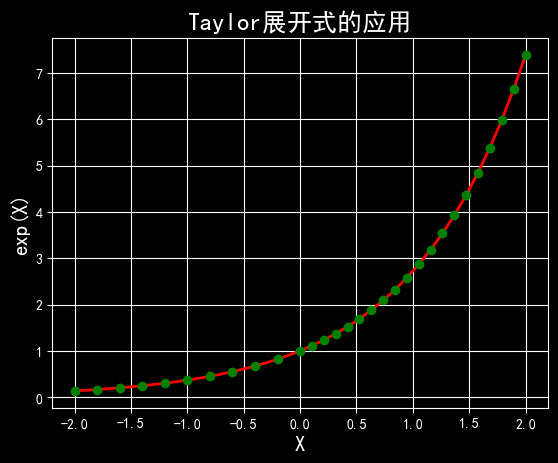

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import math

#e^x = 1 + x + x^2/2!+...
def calc_e_small(x):
    n = 10
    #累乘  cumsum是求和
    #1! 2! 3! 4! 5!...10!
    f = np.arange(1,n+1).cumprod()
    #x x^2 ... x^10
    b = np.array([x]*n).cumprod()
    return 1+np.sum(b / f)

'''
f(x)=f(x0)+f'(x0)*(x-x0)+f''(x0)/2!*(x-x0)^2+...+f(n)(x0)/n!*(x-x0)^n
x0 = ln2 
e^x = ln2 + (e^ln2)/1!*(x-ln2) + (e^ln2)/2!*(x-ln2)^2+...
x = a*ln2 + b   k<= z  |b| <= 1/2ln2
a = ln( int( x/ln2 + 0.5 ) )
b = x-a*ln2
e^x = 2^a + e^b
'''
def calc_e(x):
    reverse = False
    if x < 0:#处理负数  exp(-x) = 1/exp(x)
        x = -x
        reverse = True
    ln2 = 0.69314718055994530941723212145818
    c = x/ln2
    a = int(c+0.5)
    b = x-a*ln2
    #2的a次方乘以e的b次幂
    y = (2**a)*calc_e_small(b)
    if reverse:
        return 1/y
    return y

if __name__ == '__main__':
    #-2到0 十个数
    t1 = np.linspace(-2,0,10,endpoint=False)
    #0到2 二十个数
    t2 = np.linspace(0,2,20)
    t = np.concatenate((t1,t2))
    print(t)#横轴数据
    y = np.empty_like(t)
    for i,x in enumerate(t):
        y[i] = calc_e(x)
        print('e^',x,'=',y[i],'(近似值)\t',math.exp(x))
    mpl.rcParams['font.sans-serif'] = [u'SimHei']
    mpl.rcParams['axes.unicode_minus'] = False
    plt.plot(t, y, 'r-', linewidth=2)
    plt.plot(t, y, 'go', linewidth=2)
    plt.title(u'Taylor展开式的应用', fontsize=18)
    plt.xlabel('X', fontsize=15)
    plt.ylabel('exp(X)', fontsize=15)
    plt.grid(True)
    plt.show()
